In [16]:
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras import applications
from keras import callbacks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [17]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

train_datagenerator=train_datagen.flow_from_directory("catvsdog/train",
                                                     target_size=(150, 150),
                                                     class_mode="binary",
                                                     batch_size=150)
test_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

test_datagenerator=test_datagen.flow_from_directory("catvsdog/test",
                                                     target_size=(150, 150),
                                                     class_mode="binary",
                                                     batch_size=150)



Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               42467840  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

In [19]:
#compilamos y creamos el early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, 
    patience=5, 
    restore_best_weights=True,
)
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["binary_accuracy"])

In [20]:
#Entrenamos nuestras redes neuronales
modelHistory=model.fit(train_datagenerator,validation_data=test_datagenerator,epochs = 10,batch_size = 16,)

Epoch 1/10
167/167 [==============================] - 403s 2s/step - loss: 0.0247 - binary_accuracy: 0.9778 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000
Epoch 2/10
167/167 [==============================] - 467s 3s/step - loss: 6.6864e-39 - binary_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000
Epoch 3/10
167/167 [==============================] - 415s 2s/step - loss: 0.0000e+00 - binary_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000
Epoch 4/10
167/167 [==============================] - 428s 3s/step - loss: 5.8721e-39 - binary_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000
Epoch 5/10
167/167 [==============================] - 376s 2s/step - loss: 8.6871e-35 - binary_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000
Epoch 6/10
167/167 [==============================] - 377s 2s/step - loss: 0.0000e+00 - binary_accuracy: 1.0000 - val_loss: 2.8669e-38 - val_binary_accuracy: 1.0000
Epoch 7/10
167

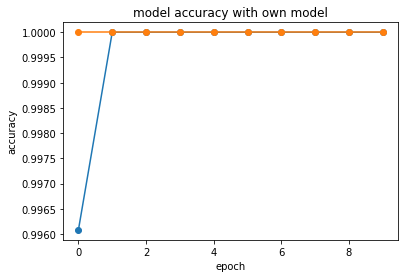

In [24]:
#Obtenemos una tabla donde poder comparar el accuracy real del esperado
plt.plot(modelHistory.history['binary_accuracy'],marker='o')
plt.plot(modelHistory.history['val_binary_accuracy'],marker='o')
plt.title('model accuracy with own model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
